<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%B4%9D%EA%B4%84(AI%2CML%2CDL%EC%9D%98_%EB%82%B4%EB%B6%80_%EC%9B%90%EB%A6%AC_(%EC%88%98%ED%95%99%2C_%EC%97%94%EC%A7%84)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI,ML,DL의 내부 원리 (수학, 엔진)

In [5]:
import numpy as np

In [1]:
from sklearn.linear_model import LinearRegression

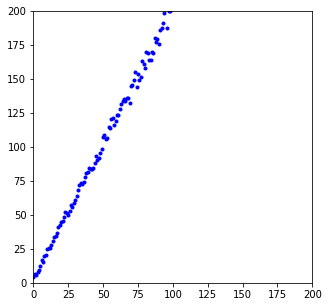

In [10]:
xs = [x for x in range(100)]
ys = [(2+np.random.uniform(-0.1,0.1))*x + 3 + np.random.uniform(-2,2) for x in xs]
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(xs,ys,'b.')
plt.xlim((0,200))
plt.ylim((0,200))
plt.show()

In [2]:
#분류모델
#from sklearn.datasets import load_iris

In [12]:
xs2 = [[x] for x in xs]
model = LinearRegression() #선형 모델 개체 생성
model.fit(xs2, ys) #학습
print(model.coef_, model.intercept_) #선형 회귀 함수의 가중치, 편향

[1.99877961] 2.847718890098747


In [17]:
def mse(yp,y):
  """
  yp:예측값
  y:실제값
  """
  return sum((yp-y)**2)/len(y)

In [18]:
w1=1
w2=2
w3=3
b1=1
b2=2
b3=3
xarr=np.array(xs)
yarr=np.array(ys)
yp11=w1*xarr + b1
yp12=w1*xarr + b2
yp13=w1*xarr + b3
yp21=w2*xarr + b1
yp22=w2*xarr + b2
yp23=w2*xarr + b3
yp31=w3*xarr + b1
yp32=w3*xarr + b2
yp33=w3*xarr + b3
print(mse(yp11, yarr))
print(mse(yp12, yarr))
print(mse(yp13, yarr))
print(mse(yp21, yarr))
print(mse(yp22, yarr))
print(mse(yp23, yarr))
print(mse(yp31, yarr))
print(mse(yp32, yarr))
print(mse(yp33, yarr))

3472.713579651655
3371.1389609210128
3271.5643421903706
14.303739818986662
11.729121088343534
11.154502357700403
3122.8938999863185
3219.3192812556745
3317.744662525034


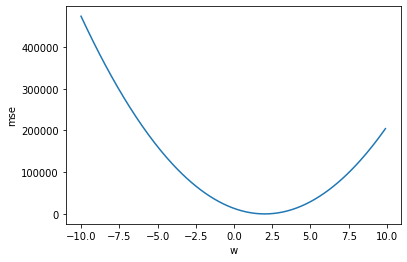

In [22]:
b=2
ws = [w/10 for w in range(-100,100)] #-10~10, step:0.1
mses = []
for w in ws:
  yp = w*xarr + b
  mses.append(mse(yp, yarr))
plt.plot(ws,mses)
plt.xlabel("w")
plt.ylabel("mse")
plt.show()

KNN 회귀

In [24]:
iris_data = load_iris()
xs = iris_data.data
ys = iris_data.target
xs.shape, ys.shape

((150, 4), (150,))

In [27]:
xs[9],xs[59],xs[109]

(array([4.9, 3.1, 1.5, 0.1]),
 array([5.2, 2.7, 3.9, 1.4]),
 array([7.2, 3.6, 6.1, 2.5]))

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
model = KNeighborsRegressor()
model.fit(xs,ys)
p_vals = model.predict([[5,3,1.6,0.1],[5.2, 2.7, 3.9, 1.4],[7.2, 3.6, 6.1, 2.5]])
p_vals, ys[9], ys[59], ys[109]

(array([0., 1., 2.]), 0, 1, 2)

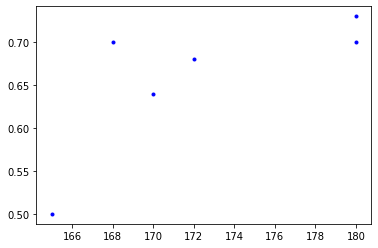

In [40]:
xs = [[172,0.68], [180,0.70],[168,0.70],[165,0.50],[180,0.73],[170,0.64]]
x1 = [x[0] for x in xs]
x2 = [x[1] for x in xs]
plt.plot(x1,x2,'b.')
plt.show()

In [41]:
xd = [[177,0.50]]
xd1 = xd[0][0]
xd2 = xd[0][1]
xd1, xd2

(177, 0.5)

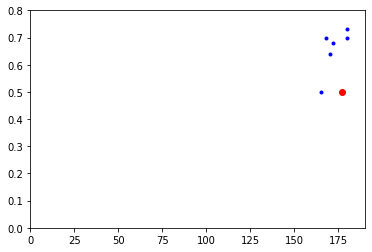

In [35]:
plt.plot(xd1,xd2,'ro')
plt.plot(x1,x2,'b.')
plt.xlim(0,190)
plt.ylim(0,0.80)
plt.show()

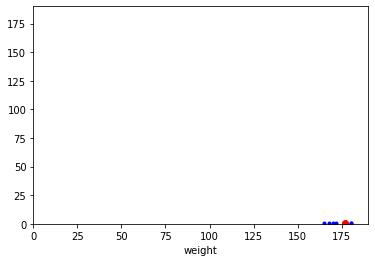

In [37]:
plt.plot(xd1,xd2,'ro')
plt.plot(x1,x2,'b.')
plt.xlim(0,190)
plt.ylim(0,190)
plt.xlabel("height")
plt.xlabel("weight")
plt.show()

In [44]:
xarr1 = np.array(x1)
xarr2 = np.array(x2)

m1 = xarr1.mean()
s1=np.std(xarr1)
m2 = xarr2.mean()
s2 = np.std(xarr2)

xarr1 = (xarr1-xarr1.mean())/np.std(xarr1) #평균을 빼고 표준편차로 나누고 : rescale
xarr2 = (xarr2-xarr2.mean())/np.std(xarr2)

#xdj1= (xd1 -xarr1.mean())/np.std(xarr1)
#xdj2= (xd2 -xarr2.mean())/np.std(xarr2)
xdj1 = (xd1-m1)/s1 #x1의 평균을 빼고 표준편차로 나누고
xdj2 = (xd2-m2)/s2

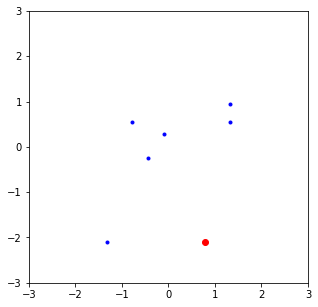

In [46]:
plt.figure(figsize=(5,5))
plt.plot(xarr1, xarr2, 'b.')
plt.plot(xdj1, xdj2, "ro")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()